In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from pysyncon import Dataprep, Synth
from pysyncon.utils import PlaceboTest

In [3]:
data = pd.read_csv('Store_data_2025.csv', sep=';')
data.head()

,storeNum,Year,Week,Date,Weekind,p1sales,p2sales,p1price,p2price,p1prom,p2prom,compind,storesize,city,citysize
0,101,2023,1,2023-01-02,1,359,436,2.79,2.59,0,0,-0.052,133,OSLO,580000
1,101,2023,2,2023-01-09,2,367,439,2.49,2.59,0,0,-0.052,133,OSLO,580000
2,101,2023,3,2023-01-16,3,360,435,2.19,2.59,0,0,-0.052,133,OSLO,580000
3,101,2023,4,2023-01-23,4,364,531,2.99,2.49,0,1,-0.052,133,OSLO,580000
4,101,2023,5,2023-01-30,5,360,439,2.49,2.29,0,0,-0.052,133,OSLO,580000


In [ ]:
## This is to make a "treated" column in the data and saving it because i dont know how to do so and index in R. 
# Therefore a index, create the column and save it to downlaod in R to run sDiD. 
W = []

for i in range(data.shape[0]):
    d = data.iloc[i,:]
    if (d.storeNum == 109) & (d.Weekind >=78):
        W.append(1)
    else:
        W.append(0)


In [193]:
df = data.loc[:, ["storeNum", "Weekind", "p1sales", "p2sales"]]
df["treated"] = W
df.to_csv('Store_data_W.csv')

In [ ]:
data['Post'] = np.where(data.Weekind >=78, 1, 0) 

In [4]:
store109 = data[data.storeNum == 109]
store109.head()

,storeNum,Year,Week,Date,Weekind,p1sales,p2sales,p1price,p2price,p1prom,p2prom,compind,storesize,city,citysize
832,109,2023,1,2023-01-02,1,286,306,2.49,2.99,0,0,0.271,101,STAV,121610
833,109,2023,2,2023-01-09,2,286,308,2.99,3.19,0,0,0.271,101,STAV,121610
834,109,2023,3,2023-01-16,3,285,313,2.99,2.29,0,0,0.271,101,STAV,121610
835,109,2023,4,2023-01-23,4,283,310,2.99,2.29,0,0,0.271,101,STAV,121610
836,109,2023,5,2023-01-30,5,283,374,2.29,2.49,0,1,0.271,101,STAV,121610


### Pre-Post analysis

In [ ]:
# Making trend lines
m = smf.ols('p1sales~Weekind', data=store109[store109.Weekind<=78]).fit()
line_pre = m.predict(store109[store109.Weekind<=78])

m2= smf.ols('p1sales~Weekind', data=store109[store109.Weekind>=78]).fit()
line_post = m2.predict(store109[store109.Weekind>=78])

m3 = smf.ols('p2sales~Weekind', data=store109[store109.Weekind<=78]).fit()
line_pre2 = m3.predict(store109[store109.Weekind<=78])

m4 = smf.ols('p2sales~Weekind', data=store109[store109.Weekind>=78]).fit()
line_post2 = m4.predict(store109[store109.Weekind>=78])

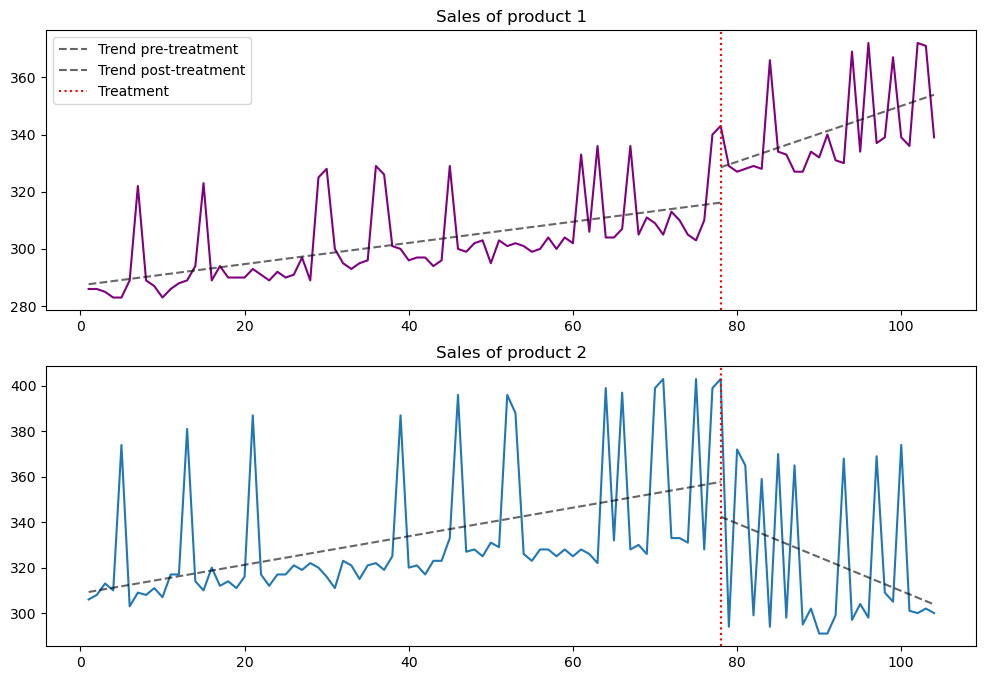

In [11]:
fig, ax = plt.subplots(2,1, figsize = (12,8))
ax[0].plot(store109.Weekind, store109.p1sales, color = 'purple')
ax[0].plot(store109[store109.Weekind<=78].Weekind, line_pre, linestyle = 'dashed', color = 'black', alpha = 0.6, label = 'Trend pre-treatment')
ax[0].plot(store109[store109.Weekind>=78].Weekind, line_post, linestyle = 'dashed', color = 'black', alpha = 0.6, label = 'Trend post-treatment')
ax[0].axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')
ax[0].set_title("Sales of product 1")
ax[0].legend()

ax[1].plot(store109.Weekind, store109.p2sales)
ax[1].plot(store109[store109.Weekind<=78].Weekind, line_pre2, linestyle = 'dashed', color = 'black', alpha = 0.6, label = 'Trend pre-treatment')
ax[1].plot(store109[store109.Weekind>=78].Weekind, line_post2, linestyle = 'dashed', color = 'black', alpha = 0.6, label = 'Trend post-treatment')
ax[1].set_title("Sales of product 2")
ax[1].axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')


In [12]:
m = smf.ols('p1sales ~ Post + p1price + p1prom', data = store109).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                p1sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     322.2
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           3.05e-51
Time:                        16:38:18   Log-Likelihood:                -348.49
No. Observations:                 104   AIC:                             705.0
Df Residuals:                     100   BIC:                             715.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    308.6383      5.837     52.878      0.000     297.058     320.218
Post          36.0484      1.589     22.681      0.000      32.895      39.202
p1price       -4.6891      2.262     -2.073      0.041      -9.177      -0.201
p1prom        33.0797      1.842     17.963      0.000      29.426      36.733
==============================================================================
Omnibus:                        0.738   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.856
Skew:                          -0.177   Prob(JB):                        0.652
Kurtosis:                       2.731   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
m = smf.ols('p2sales ~ Post + p2price + p2prom', data = store109).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                p2sales   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     502.1
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           3.99e-60
Time:                        16:38:18   Log-Likelihood:                -358.76
No. Observations:                 104   AIC:                             725.5
Df Residuals:                     100   BIC:                             736.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    333.0652      6.418     51.892      0.000     320.331     345.799
Post         -21.0193      1.779    -11.818      0.000     -24.548     -17.491
p2price       -4.6867      2.334     -2.008      0.047      -9.318      -0.055
p2prom        71.9022      1.940     37.069      0.000      68.054      75.750
==============================================================================
Omnibus:                        7.165   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                9.074
Skew:                           0.342   Prob(JB):                       0.0107
Kurtosis:                       4.275   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Diff in diff

In [14]:
control = data[data.storeNum!= 109]
control_p1 = control.groupby('Weekind').p1sales.mean()
control_p2 = control.groupby('Weekind').p2sales.mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


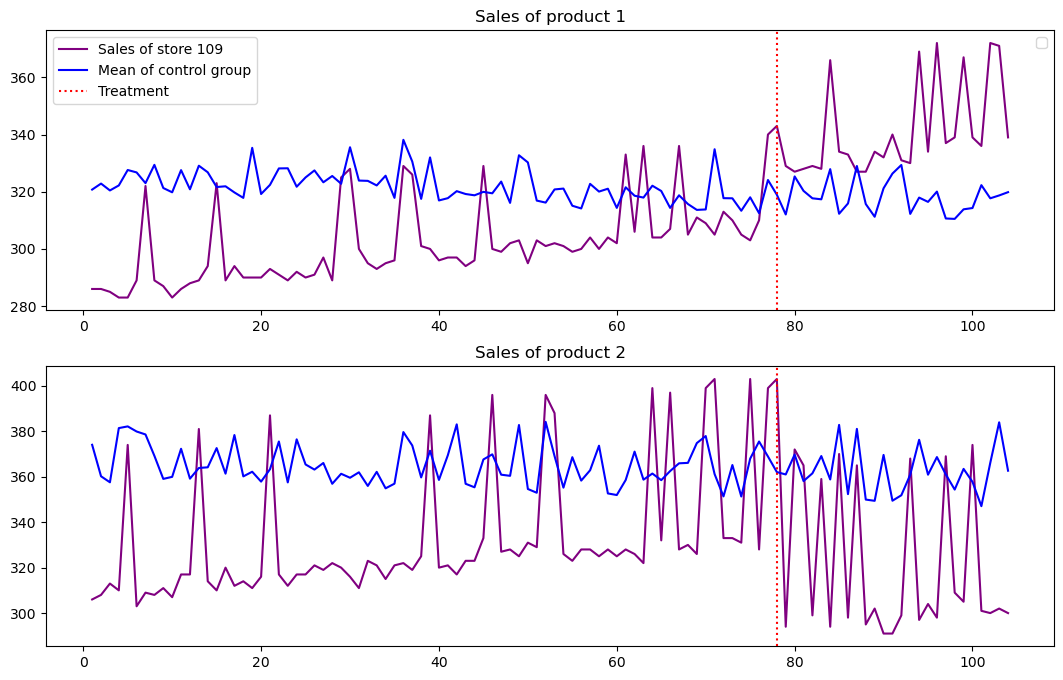

In [15]:
fig, ax = plt.subplots(2,1, figsize = (13,8))
p1, = ax[0].plot(store109.Weekind, store109.p1sales, color = 'purple')
p2 = ax[0].plot(store109.Weekind, control_p1, color = 'blue')
p3 = ax[0].axvline(78, linestyle= "dotted", color = 'red')
ax[0].set_title("Sales of product 1")
ax[0].legend()

ax[1].set_title("Sales of product 2")
ax[1].plot(store109.Weekind, store109.p2sales, color = 'purple')
ax[1].plot(store109.Weekind, control_p2, color = 'blue')
ax[1].axvline(78, linestyle= "dotted", color = 'red')

plt.legend(['Sales of store 109', 'Mean of control group', 'Treatment'], loc = 'upper left', bbox_to_anchor =(0,2.2))
plt.show()

The mean of the control group is not comparable to the trend of store 109.

In [16]:
s109_p1sales = store109[store109.Weekind <78]['p1sales'].diff()[1:]


closest_store = 0
dist = np.infty
for store in data.storeNum.unique():
    if store != 109:
        cand = data[(data.storeNum == store)& (data.Weekind <78)].p1sales.diff()[1:]
        d = np.sum(np.abs(s109_p1sales - cand))
        if d < dist:
            closest_store = store
            dist = d
        else:
            continue
closest_store
        

101

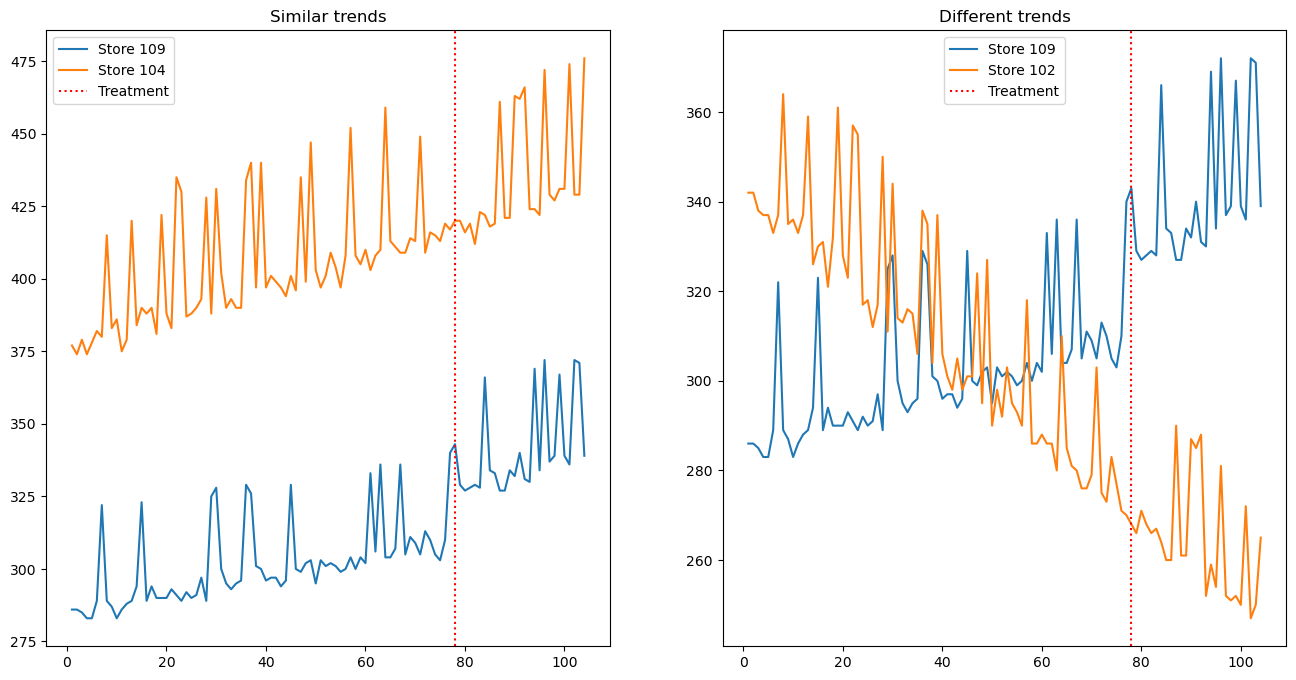

In [17]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
match4 = data[data.storeNum == 104].p1sales
ax[0].plot(store109.Weekind, store109.p1sales, label='Store 109')
ax[0].plot(store109.Weekind, match4, label='Store 104')
ax[0].axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')
ax[0].set_title('Similar trends')
ax[0].legend()

match2 = data[data.storeNum == 102].p1sales
ax[1].plot(store109.Weekind, store109.p1sales, label='Store 109')
ax[1].plot(store109.Weekind, match2, label='Store 102')
ax[1].axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')
ax[1].set_title('Different trends')
ax[1].legend(loc = 'upper center')

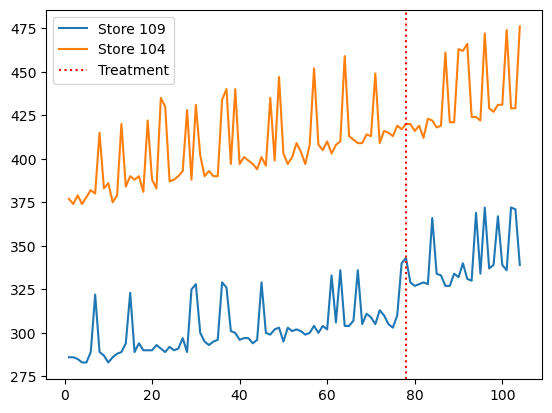

In [18]:
match = data[data.storeNum == 104].p1sales
plt.plot(store109.Weekind, store109.p1sales, label='Store 109')
plt.plot(store109.Weekind, match, label='Store 104')

plt.axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')

plt.legend()
plt.show()

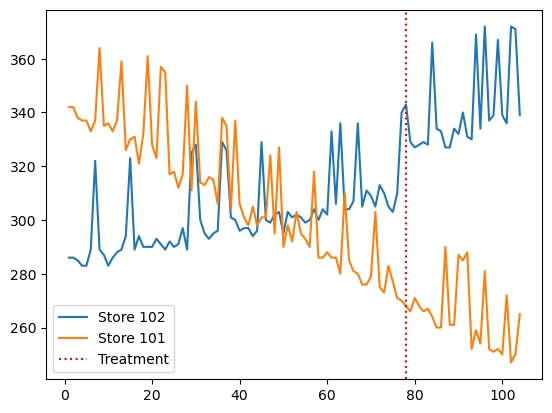

In [19]:
match = data[data.storeNum == 102].p1sales
plt.plot(store109.Weekind, store109.p1sales, label='Store 102')
plt.plot(store109.Weekind, match, label='Store 101')

plt.axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')

plt.legend()
plt.show()

In [20]:
''' 
W = []

for i in range(data.shape[0]):
    d = data.iloc[i,:]
    if (d.storeNum == '109') & (d.Weekind >=78):
        W.append(1)
    else:
        W.append(0)
'''
data['W'] = np.where(data.storeNum == 109, 1, 0)

In [21]:
m_diff = smf.ols('p1sales ~ W + Post + W*Post', data=data).fit()
m_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                p1sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.041
Date:                Wed, 02 Apr 2025   Prob (F-statistic):             0.0279
Time:                        16:38:19   Log-Likelihood:                -12404.
No. Observations:                2184   AIC:                         2.482e+04
Df Residuals:                    2180   BIC:                         2.484e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    322.0532      1.807    178.185      0.000     318.509     325.598
W            -20.6636      8.283     -2.495      0.013     -36.906      -4.421
Post          -3.7125      3.547     -1.047      0.295     -10.669       3.244
W:Post        43.5451     16.256      2.679      0.007      11.667      75.423
==============================================================================
Omnibus:                      168.301   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.083
Skew:                           0.744   Prob(JB):                     1.08e-45
Kurtosis:                       3.253   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
m_diff = smf.ols('p2sales ~ W + Post + W*Post', data=data).fit()
m_diff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                p2sales   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.316
Date:                Wed, 02 Apr 2025   Prob (F-statistic):            0.00483
Time:                        16:38:19   Log-Likelihood:                -13087.
No. Observations:                2184   AIC:                         2.618e+04
Df Residuals:                    2180   BIC:                         2.620e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    365.2091      2.471    147.820      0.000     360.364     370.054
W            -32.6117     11.322     -2.880      0.004     -54.815     -10.409
Post          -2.6258      4.849     -0.542      0.588     -12.135       6.883
W:Post        -6.8605     22.220     -0.309      0.758     -50.436      36.715
==============================================================================
Omnibus:                      293.841   Durbin-Watson:                   0.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.056
Skew:                           0.990   Prob(JB):                     1.12e-93
Kurtosis:                       3.883   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-----------

# synthetic controls

In [23]:
data['storeNum']  = [str(i) for i in data['storeNum']]

In [ ]:
dataprep = Dataprep(
    foo = data,
    predictors = ["p1sales",'p1price', 'p1prom', 'compind', 'storesize'],
    predictors_op="mean",
    time_predictors_prior=range(1,78),
    #special_predictors=
    dependent = 'p1sales',
    unit_variable= 'storeNum',
    time_variable='Weekind',
    treatment_identifier='109',
    controls_identifier= ['101', '102', '103', '104', '105', '106', '107', '108', '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121'],
    time_optimize_ssr= range(1,78)
)
synth = Synth()
synth.fit(dataprep=dataprep, optim_method="BFGS", optim_initial="ols")

p1_weights = synth.weights()

In [25]:
print(dataprep)

Dataprep
Treated unit: 109
Dependent variable: p1sales
Control units: 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121
Time range in data: 1 - 104
Time range for loss minimization: range(1, 78)
Time range for predictors: range(1, 78)
Predictors: p1sales, p1price, p1prom, compind, storesize



In [28]:
placebo_test = PlaceboTest()
placebo_test.fit(
    dataprep=dataprep,
    scm=synth,
    scm_options={"optim_method": "Nelder-Mead", "optim_initial": "equal"},
)

(1/20) Completed placebo test for 106.
(2/20) Completed placebo test for 103.
(3/20) Completed placebo test for 102.
(4/20) Completed placebo test for 105.
(5/20) Completed placebo test for 111.
(6/20) Completed placebo test for 104.
(7/20) Completed placebo test for 107.
(8/20) Completed placebo test for 110.
(9/20) Completed placebo test for 113.
(10/20) Completed placebo test for 112.
(11/20) Completed placebo test for 115.
(12/20) Completed placebo test for 118.
(13/20) Completed placebo test for 101.
(14/20) Completed placebo test for 120.
(15/20) Completed placebo test for 114.
(16/20) Completed placebo test for 121.
(17/20) Completed placebo test for 116.
(18/20) Completed placebo test for 117.
(19/20) Completed placebo test for 108.
(20/20) Completed placebo test for 119.
Calculating treated unit gaps.
Done.


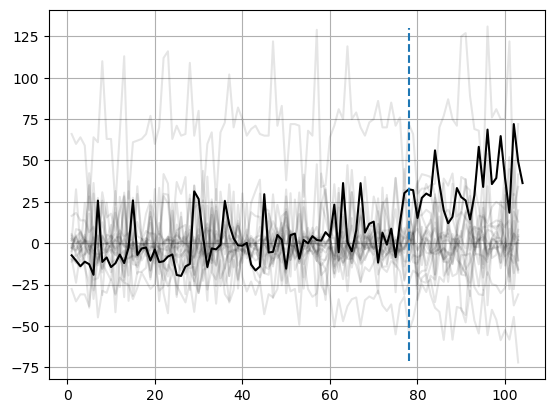

In [29]:
placebo_test.gaps_plot(
    time_period=range(1,104), treatment_time=78
)

In [42]:
def add_to_synth(series, synth, weight):
    for i in range(104):
        synth.iloc[i] += series.iloc[i] *weight
    return synth


def synthetic_control_generator(weights, dependent):
    synthetic = pd.Series(np.zeros(104))
    for store in weights.index:
        series = data[data.storeNum == store][dependent]
        synthetic = add_to_synth(series, synthetic, weights[store])
    return synthetic


In [92]:
def make_synthetic_control(dependent, out = False):
    dataprep = Dataprep(
    foo = data,
    predictors = ["p1sales",'p1price', 'p1prom', "p2sales",'p2price', 'p2prom', 'compind', 'storesize'],
    predictors_op="mean",
    time_predictors_prior=range(1,78),
    #special_predictors=
    dependent = dependent,
    unit_variable= 'storeNum',
    time_variable='Weekind',
    treatment_identifier='109',
    controls_identifier= ['101', '102', '103', '104', '105', '106', '107', '108', '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121'],
    time_optimize_ssr= range(1,78)
    )
    synth = Synth()
    synth.fit(dataprep=dataprep, optim_method="BFGS", optim_initial="ols")
    w = synth.weights()
    s = synthetic_control_generator(w, dependent)
    if out:
       return synth, dataprep
    else:
       return s,w

In [46]:
s1, w_1 = make_synthetic_control('p1sales')
s2, w_2 = make_synthetic_control('p2sales')

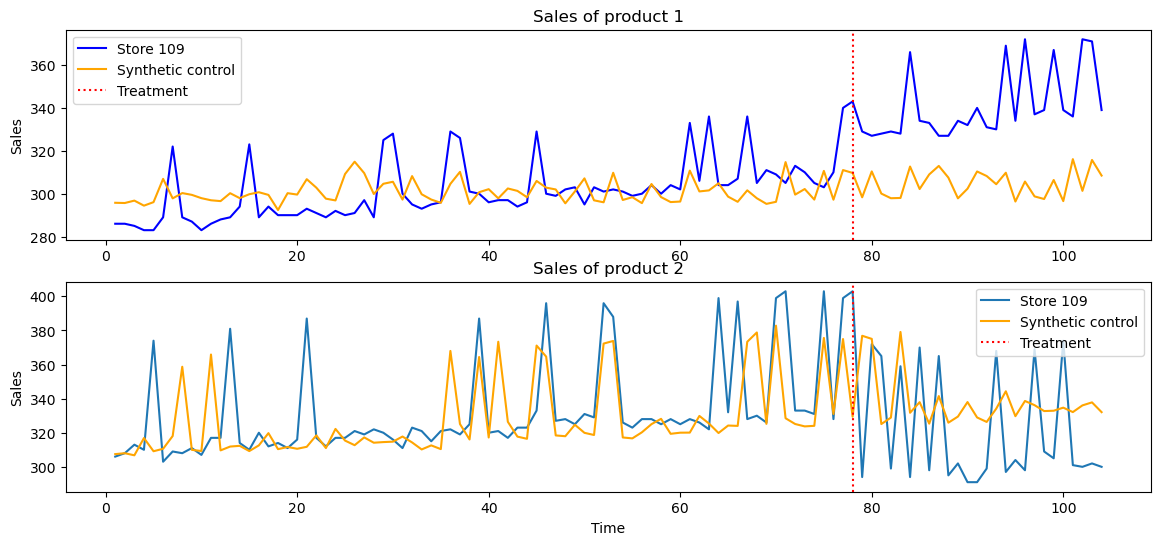

In [65]:
fig, ax = plt.subplots(2,1, figsize = (14,6))
plt.xlabel('Time')
plt.ylabel('Sales')
p1 = ax[0].plot(store109.Weekind, store109.p1sales, label='Store 109', color = "blue")
p2 = ax[0].plot(store109.Weekind, s1, label='Synthetic control', color = 'orange')
p3 = ax[0].axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')
ax[0].set_title('Sales of product 1')
ax[0].set_ylabel('Sales')
p4 = ax[1].plot(store109.Weekind, store109.p2sales, label='Store 109')
p5 = ax[1].plot(store109.Weekind, s2, label='Synthetic control', color = 'orange')
p6 = ax[1].axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')
ax[1].set_title('Sales of product 2')

ax[0].legend()
ax[1].legend()
plt.show()
# Runs?

In [74]:
print(w_1.sort_values(ascending=False)[w_1>0])

115    0.336
119    0.161
113    0.145
104    0.129
110    0.128
116    0.074
114    0.028
Name: weights, dtype: float64


In [75]:
print(w_2.sort_values(ascending=False)[w_2>0])

116    0.458
115    0.377
104    0.078
118    0.064
121    0.024
Name: weights, dtype: float64


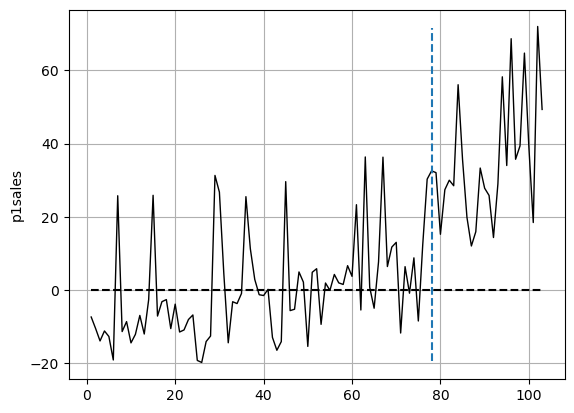

In [38]:
synth.gaps_plot(time_period=range(1,104), treatment_time=78)

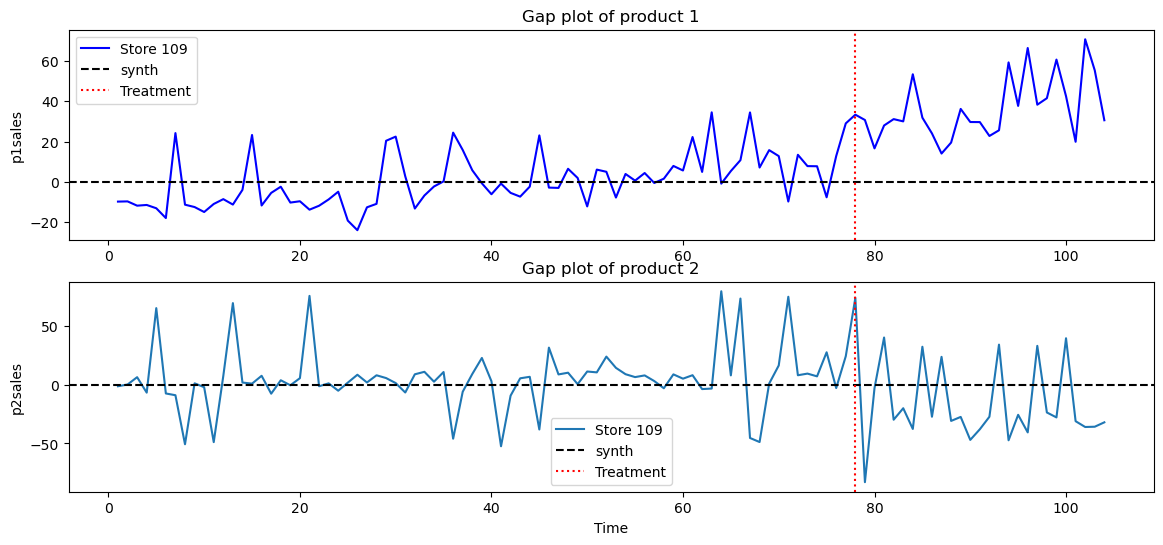

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (14,6))
plt.xlabel('Time')

p1 = ax[0].plot(store109.Weekind, np.array(store109.p1sales)-s1, color = "blue", label = "Store 109")
p2 = ax[0].axhline(0,0,1,linestyle='dashed', color = "black", label = "synth")
p3 = ax[0].axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')

ax[0].set_title('Gap plot of product 1')
ax[0].set_ylabel('p1sales')
p4 = ax[1].plot(store109.Weekind, np.array(store109.p2sales)-s2, label = "Store 109")
p5 = ax[1].axhline(0,0,1,linestyle='dashed', color = "black", label = "synth")
p6 = ax[1].axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')
ax[1].set_title('Gap plot of product 2')
ax[1].set_ylabel('p2sales')
ax[0].legend()
ax[1].legend()
plt.show()

In [118]:
synth, dataprep= make_synthetic_control('p1sales', out=True)

placebo_test_s1 = PlaceboTest()
placebo_test_s1.fit(
    dataprep=dataprep,
    scm=synth,
    scm_options={"optim_method": "Nelder-Mead", "optim_initial": "equal"},
)

(1/20) Completed placebo test for 105.
(2/20) Completed placebo test for 103.
(3/20) Completed placebo test for 106.
(4/20) Completed placebo test for 102.
(5/20) Completed placebo test for 112.
(6/20) Completed placebo test for 113.
(7/20) Completed placebo test for 104.
(8/20) Completed placebo test for 115.
(9/20) Completed placebo test for 116.
(10/20) Completed placebo test for 117.
(11/20) Completed placebo test for 111.
(12/20) Completed placebo test for 120.
(13/20) Completed placebo test for 108.
(14/20) Completed placebo test for 110.
(15/20) Completed placebo test for 114.
(16/20) Completed placebo test for 121.
(17/20) Completed placebo test for 118.
(18/20) Completed placebo test for 107.
(19/20) Completed placebo test for 101.
(20/20) Completed placebo test for 119.
Calculating treated unit gaps.
Done.


In [120]:
synth.att(range(78,104))

{'att': 36.941222274056365, 'se': 2.8518121724370604}

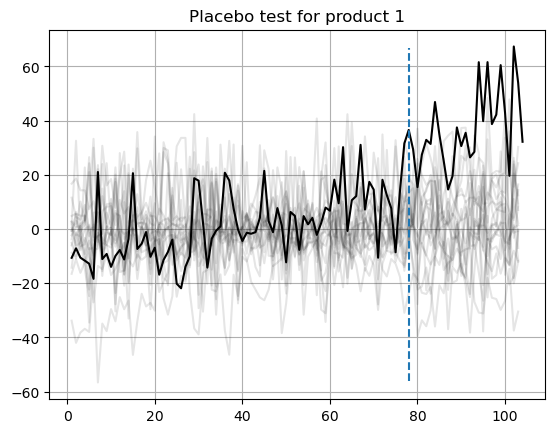

In [ ]:
plt.title('Placebo test for product 1')
placebo_test_s1.gaps_plot(
    time_period=range(1,104), treatment_time=78, exclude_units=["103", "105"]
)

In [128]:
synth, dataprep = make_synthetic_control('p2sales', out=True)
placebo_test_s2 = PlaceboTest()
placebo_test_s2.fit(
    dataprep=dataprep,
    scm=synth,
    scm_options={"optim_method": "Nelder-Mead", "optim_initial": "ols"},
)


(1/20) Completed placebo test for 103.
(2/20) Completed placebo test for 105.
(3/20) Completed placebo test for 104.
(4/20) Completed placebo test for 101.
(5/20) Completed placebo test for 112.
(6/20) Completed placebo test for 111.
(7/20) Completed placebo test for 115.
(8/20) Completed placebo test for 113.
(9/20) Completed placebo test for 110.
(10/20) Completed placebo test for 108.
(11/20) Completed placebo test for 102.
(12/20) Completed placebo test for 117.
(13/20) Completed placebo test for 106.
(14/20) Completed placebo test for 119.
(15/20) Completed placebo test for 120.
(16/20) Completed placebo test for 107.
(17/20) Completed placebo test for 118.
(18/20) Completed placebo test for 114.
(19/20) Completed placebo test for 116.
(20/20) Completed placebo test for 121.
Calculating treated unit gaps.
Done.


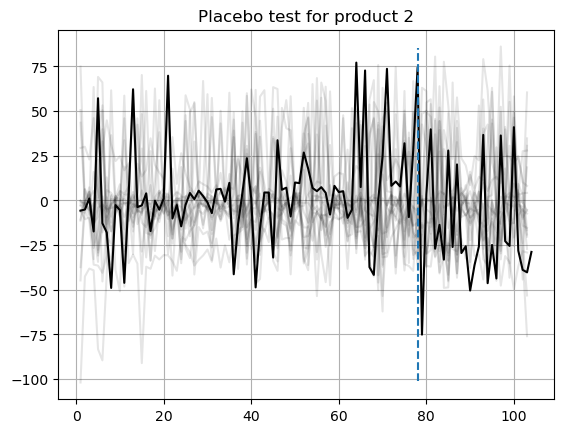

In [129]:
plt.title('Placebo test for product 2')
placebo_test_s2.gaps_plot(
    time_period=range(1,104), treatment_time=78, exclude_units=['103', "105"]
)

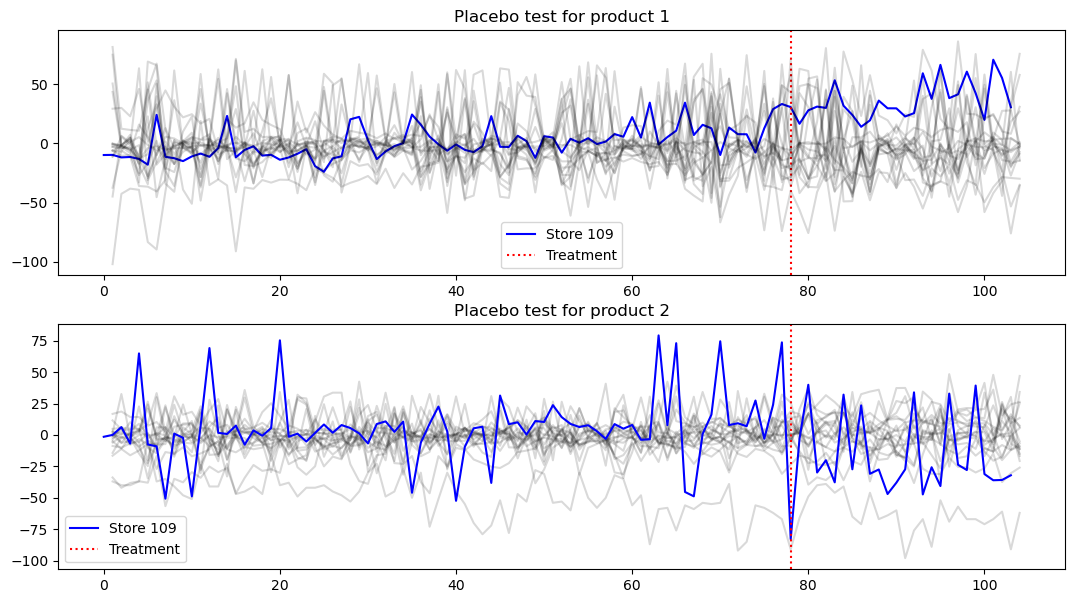

In [184]:
fig, ax = plt.subplots(2,1, figsize = (13,7))
g_s1 = np.array(store109.p1sales)-s1
g_s2 = np.array(store109.p2sales)-s2

for store in placebo_test_s1.gaps.columns:
    if store not in ["103"]:
        line = placebo_test_s1.gaps[store]
        ax[1].plot(line, color = "black", alpha = 0.15)
    else:
        continue
ax[0].plot(g_s1, color = "blue", label = "Store 109")
ax[0].axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')
ax[0].set_title('Placebo test for product 1')
ax[0].legend()

for store in placebo_test_s2.gaps.columns:
    if store not in ["103"]:
        line = placebo_test_s2.gaps[store]
        ax[0].plot(line, color = "black", alpha = 0.15)
    else:
        continue
ax[1].plot(g_s2, color = "blue", label = "Store 109")
ax[1].axvline(78, linestyle= "dotted", color = 'red', label = 'Treatment')
ax[1].set_title('Placebo test for product 2')
ax[1].legend()
plt.show()

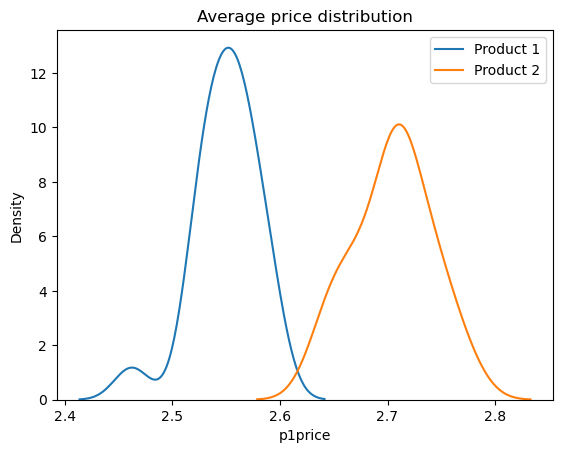

In [207]:
import seaborn as sns
p1_prices = data.groupby('storeNum').p1price.mean()
p2_prices = data.groupby('storeNum').p2price.mean()
sns.kdeplot(p1_prices, label = "Product 1")
sns.kdeplot(p2_prices, label = "Product 2")

plt.title("Average price distribution")
plt.legend()
plt.show()

In [212]:
p1_m = np.mean(p1_prices)
p2_m = np.mean(p2_prices)
ATET_p1 = 36.94
ATET_p2 = -17.64

loss_p2 = ATET_p2 * p2_m
print(f"Loss: {loss_p2}")
gain_p1 = p1_m * ATET_p1
print(f"Gain: {gain_p1}")

total_rev_change = gain_p1+loss_p2
print(f"Change in weekly revenue: {total_rev_change}")

Loss: -47.71006153846154
Gain: 94.18617509157508
Change in weekly revenue: 46.47611355311354


In [214]:
print(p1_m)
print(p2_m)

2.5497069597069597
2.7046520146520145
